# Kaggle Survey 2021


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from IPython.display import display , Markdown

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 400)

In [3]:
df = pd.read_csv("kaggle_survey_2021_responses.csv", low_memory=False)

In [4]:
df.rename(columns = {'Time from Start to Finish (seconds)':'Time'}, inplace = True)

In [5]:
df.describe()

Time     Q1     Q2     Q3               Q4       Q5         Q6  \
count   25974  25974  25974  25974            25974    25974      25974   
unique   4422     12      6     67                8       16          8   
top       484  25-29    Man  India  Master’s degree  Student  1-3 years   
freq       44   4931  20598   7434            10132     6804       7874   

       Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6  \
count      21861      5335     10757      4710      5536      4770   
unique         2         2         2         2         2         2   
top       Python         R       SQL         C       C++      Java   
freq       21860      5334     10756      4709      5535      4769   

         Q7_Part_7 Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12  \
count         4333       306       243       2217       2936        320   
unique           2         2         2          2          2          2   
top     Javascript     Julia     Swift       Bash     MATLAB       None   
freq          4332       305       242       2216       2935        319   

       Q7_OTHER      Q8                                      Q9_Part_1  \
count      2576   24941                                           5489   
unique        2      14                                              2   
top       Other  Python  Jupyter (JupyterLab, Jupyter Notebooks, etc)    
freq       2575   20213                                           5488   

        Q9_Part_2        Q9_Part_3                      Q9_Part_4  Q9_Part_5  \
count        4772             4111                          10041       7469   
unique          2                2                              2          2   
top      RStudio    Visual Studio    Visual Studio Code (VSCode)    PyCharm    
freq         4771             4110                          10040       7468   

         Q9_Part_6      Q9_Part_7         Q9_Part_8        Q9_Part_9  \
count         3795           3938              2840             1647   
unique           2              2                 2                2   
top       Spyder      Notepad++      Sublime Text      Vim / Emacs     
freq          3794           3937              2839             1646   

       Q9_Part_10         Q9_Part_11 Q9_Part_12 Q9_OTHER         Q10_Part_1  \
count        2204              16234        527     1492               9508   
unique          2                  2          2        2                  2   
top       MATLAB    Jupyter Notebook       None    Other   Kaggle Notebooks   
freq         2203              16233        526     1491               9507   

             Q10_Part_2       Q10_Part_3               Q10_Part_4  \
count              9793             1063                      210   
unique                2                2                        2   
top     Colab Notebooks  Azure Notebooks   Paperspace / Gradient    
freq               9792             1062                      209   

                   Q10_Part_5    Q10_Part_6           Q10_Part_7  \
count                    1771           176                 1068   
unique                      2             2                    2   
top      Binder / JupyterHub    Code Ocean    IBM Watson Studio    
freq                     1770           175                 1067   

                                 Q10_Part_8              Q10_Part_9  \
count                                   754                     349   
unique                                    2                       2   
top      Amazon Sagemaker Studio Notebooks    Amazon EMR Notebooks    
freq                                    753                     348   

                                              Q10_Part_10  \
count                                                2052   
unique                                                  2   
top     Google Cloud Notebooks (AI Platform / Vertex AI)    
freq                                                 2051   

                 Q10_Part_11

In [6]:
questions = df.iloc[0]
questions = questions.to_dict()
df = df.iloc[1:,:]

def display_question(i):
    display(Markdown("{} \n {}".format(i, questions[i])))

# From Q1 to Q4 search will return wrong.
def search_question(q_key):
    keys = []
    for k in questions.keys():
        if k.startswith(q_key.capitalize()):
            keys.append(k)
    return keys

In [7]:
q1_ord = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+']
q4_ord = ['No formal education past high school','Some college/university study without earning a bachelor’s degree','Bachelor’s degree','Master’s degree','Doctoral degree','Professional doctorate','I prefer not to answer']
q6_ord = ['I have never written code','< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','20+ years']

In [8]:
fig = px.histogram(df, x="Q1")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [9]:
fig = px.density_heatmap(df, y="Q1", x="Q2",category_orders={'Q1':q1_ord})
fig.update_layout(yaxis={'categoryorder':'total descending'})
fig.show()

In [10]:
fig = px.density_heatmap(df, x="Q6", y="Q1",category_orders={'Q1':q1_ord,'Q6':q6_ord})
fig.update_layout(yaxis={'categoryorder':'total descending'})
fig.show()

In [11]:
nevercodedf = df[df.Q6 == 'I have never written code']

In [12]:
fig = px.density_heatmap(nevercodedf, x="Q6", y="Q1",category_orders={'Q1':q1_ord})
fig.update_layout(yaxis={'categoryorder':'total descending'})
fig.show()

In [13]:
fig = px.density_heatmap(df, x="Q2", y="Q4", category_orders={"Q4":q4_ord})
fig.show()

In [14]:
womandf = df[df.Q2 == "Woman"]
total_woman = womandf.Q2.value_counts()
total_woman = total_woman[0]

q4wom_id = womandf.Q4.value_counts().index.tolist()
q4wom_val = womandf.Q4.value_counts().tolist()
q4wom_perc = []
res = dict(zip(q4wom_id, q4wom_val))
for v in res:
    percent = (res[v]/total_woman)
    q4wom_perc.append(percent*100)

woman_per = dict(zip(q4wom_id, q4wom_perc))

In [15]:
mandf = df[df.Q2 == "Man"]
total_man = mandf.Q2.value_counts()
total_man = total_man[0]

q4man_id = mandf.Q4.value_counts().index.tolist()
q4man_val = mandf.Q4.value_counts().tolist()
q4man_perc = []
res = dict(zip(q4man_id, q4man_val))
for v in res:
    percent = (res[v]/total_man)
    q4man_perc.append(percent*100)
    
man_per = dict(zip(q4man_id, q4man_perc))

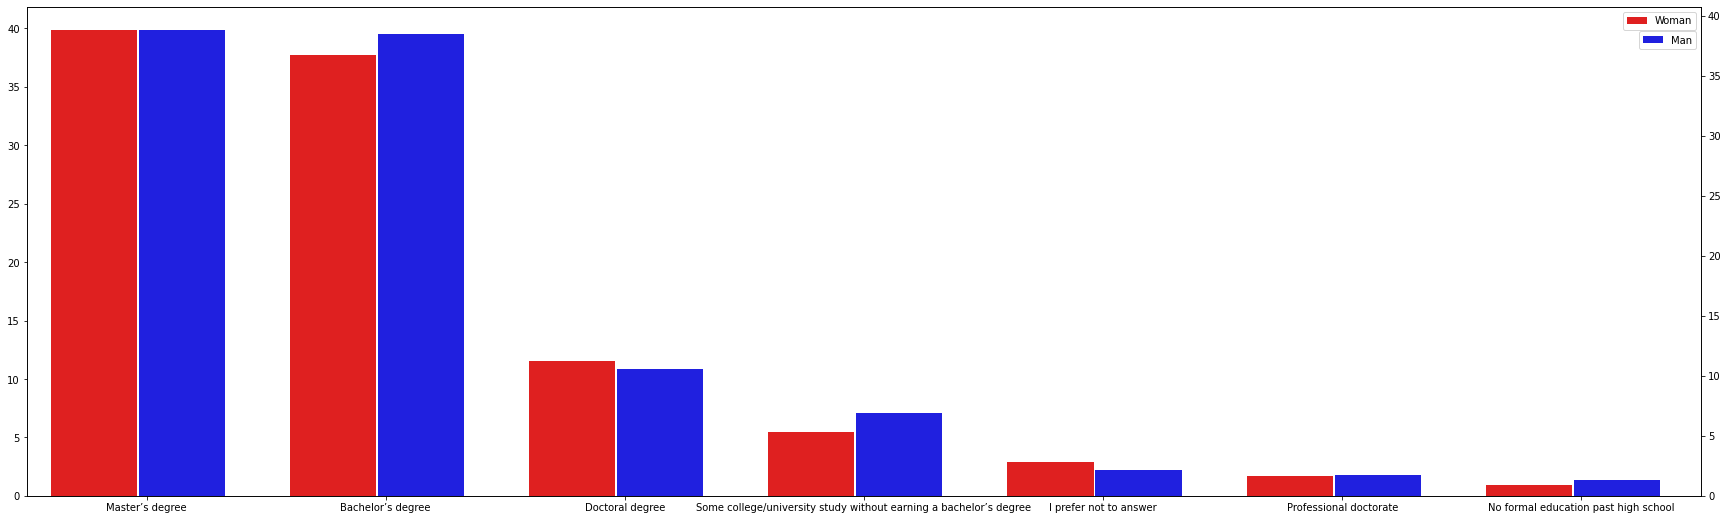

In [16]:
keys = list(woman_per.keys())
vals = list(woman_per.values())
vals2 = list(man_per.values())
fig, ax = plt.subplots(figsize=(30,9))
ax = sns.barplot(x=keys, y=vals, color="red", label='Woman')
ax2 = ax.twinx()

width_scale = 0.45
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)

ax2 = sns.barplot(x=keys, y=vals2, ax=ax2, color="blue", label='Man')

for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (0.01+width_scale))
    bar.set_width(w * width_scale)

ax.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor = (1,0.96))
plt.show()